# Introduction to Clustering and Topic Modelling (Using R)

K-Means clustering example

Reference: https://www.datacamp.com/community/tutorials/k-means-clustering-r 

In [3]:
library('data.table')

# Load the .csv files
apr14 <- fread("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv")

# apr14 <- readRDS('./data/apr14.RDS')

#Top 10 lines of the dataset
head(apr14,n=10)
#Summary of the dataset
cat('Summary of Apr14 dataset')
str(apr14)

Date/Time,Lat,Lon,Base
4/1/2014 0:11:00,40.7690,-73.9549,B02512
4/1/2014 0:17:00,40.7267,-74.0345,B02512
4/1/2014 0:21:00,40.7316,-73.9873,B02512
4/1/2014 0:28:00,40.7588,-73.9776,B02512
4/1/2014 0:33:00,40.7594,-73.9722,B02512
4/1/2014 0:33:00,40.7383,-74.0403,B02512
4/1/2014 0:39:00,40.7223,-73.9887,B02512
4/1/2014 0:45:00,40.7620,-73.9790,B02512
4/1/2014 0:55:00,40.7524,-73.9960,B02512
4/1/2014 1:01:00,40.7575,-73.9846,B02512


Summary of Apr14 datasetClasses 'data.table' and 'data.frame':	564516 obs. of  4 variables:
 $ Date/Time: chr  "4/1/2014 0:11:00" "4/1/2014 0:17:00" "4/1/2014 0:21:00" "4/1/2014 0:28:00" ...
 $ Lat      : num  40.8 40.7 40.7 40.8 40.8 ...
 $ Lon      : num  -74 -74 -74 -74 -74 ...
 $ Base     : chr  "B02512" "B02512" "B02512" "B02512" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [4]:
# Read all other csv files

#may14 <- fread("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-may14.csv")
#jun14 <- fread("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-jun14.csv")
#jul14 <- fread("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-jul14.csv")
#aug14 <- fread("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-aug14.csv")
#sep14 <- fread("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-sep14.csv")

may14 <- readRDS('./data/may14.RDS')
jun14 <- readRDS('./data/jun14.RDS')
jul14 <- readRDS('./data/jul14.RDS')
aug14 <- readRDS('./data/aug14.RDS')
sep14 <- readRDS('./data/sep14.RDS')

In [5]:
# Join all datasets using dplyr
library(dplyr)
data14 <- bind_rows(apr14, may14, jun14, jul14, aug14, sep14)

#Display summary of joined dataset
cat('Summary of joined dataset')
summary(data14)


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Summary of joined dataset

  Date/Time              Lat             Lon             Base          
 Length:4534327     Min.   :39.66   Min.   :-74.93   Length:4534327    
 Class :character   1st Qu.:40.72   1st Qu.:-74.00   Class :character  
 Mode  :character   Median :40.74   Median :-73.98   Mode  :character  
                    Mean   :40.74   Mean   :-73.97                     
                    3rd Qu.:40.76   3rd Qu.:-73.97                     
                    Max.   :42.12   Max.   :-72.07                     

In [6]:
#Run k means clustering with K=5
clusters <- kmeans(data14[,2:3], 5)

#Add cluster IDs back to orginal data frame
data14$clustID <- as.factor(clusters$cluster)

print(head(data14))

          Date/Time     Lat      Lon   Base clustID
1: 4/1/2014 0:11:00 40.7690 -73.9549 B02512       1
2: 4/1/2014 0:17:00 40.7267 -74.0345 B02512       5
3: 4/1/2014 0:21:00 40.7316 -73.9873 B02512       5
4: 4/1/2014 0:28:00 40.7588 -73.9776 B02512       1
5: 4/1/2014 0:33:00 40.7594 -73.9722 B02512       1
6: 4/1/2014 0:33:00 40.7383 -74.0403 B02512       5


In [7]:
#Show the count 
table(data14$clustID)

#Show the count in percentage
table(data14$clustID)/nrow(data14)*100


      1       2       3       4       5 
2068463   45630  238328  147669 2034237 


        1         2         3         4         5 
45.617861  1.006324  5.256083  3.256691 44.863041 

In [ ]:
#Visualization 
#library(ggmap)

#NYCMap <- get_map("New York", zoom = 10)
#ggmap(NYCMap) + geom_point(aes(x = Lon[], y = Lat[], colour = as.factor(clustID)),data = data14) +
#  ggtitle("NYC Clusters using KMean")

<img src= "./images/nyc_cluster.jpg",style= "border: 1px solid black;">

### <font color='blue'>Knowledge check</font>
       Q1. Is it a right approach?
       Q2. Will I get same result if re-run?
       Q3. How to find best K?  
       Q4. What is the key concept/measure used in Kmeans?

In [8]:
# Second attempt
#Run k means clustering with K=5
clusters <- kmeans(data14[,2:3], 5)
data14$clustID <- as.factor(clusters$cluster)

cat(paste("Second attempt\n"))
#Show the count in percentage
table(data14$clustID)/nrow(data14)*100

Second attempt



        1         2         3         4         5 
46.941586  1.000501  6.101523 33.137178 12.819212 

In [9]:
#Third attempt
#Run k means clustering with K=5
clusters <- kmeans(data14[,2:3], 5)
data14$clustID <- as.factor(clusters$cluster)
cat(paste("Third attempt\n"))
#Show the count in percentage
table(data14$clustID)/nrow(data14)*100

Third attempt



        1         2         3         4         5 
 3.200232 12.609435  4.798198 39.747927 39.644207 

In [10]:
set.seed(12345)
#Run k means clustering with K=5
clusters <- kmeans(data14[,2:3], 5)
data14$clustID <- as.factor(clusters$cluster)
cat(paste("First attempt with seed=12345\n"))
#Show the count in percentage
table(data14$clustID)/nrow(data14)*100


set.seed(12345)
#Run k means clustering with K=5
clusters <- kmeans(data14[,2:3], 5)
data14$clustID <- as.factor(clusters$cluster)
cat(paste("Second attempt with seed=12345\n"))
#Show the count in percentage
table(data14$clustID)/nrow(data14)*100


First attempt with seed=12345



        1         2         3         4         5 
46.941167 12.819102  6.101743  1.000501 33.137487 

Second attempt with seed=12345



        1         2         3         4         5 
46.941167 12.819102  6.101743  1.000501 33.137487 

# How to pick best K? 
Select K such that 
- Intra-cluster distance is minimized
- Inter-cluster distance is maximized

In [11]:
#Understand the output of k-means 
help(kmeans)
str(clusters)

List of 9
 $ cluster     : int [1:4534327] 5 1 1 5 5 1 1 5 1 5 ...
 $ centers     : num [1:5, 1:2] 40.7 40.7 40.7 40.7 40.8 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:2] "Lat" "Lon"
 $ totss       : num 22107
 $ withinss    : num [1:5] 719 997 3524 471 1650
 $ tot.withinss: num 7361
 $ betweenss   : num 14746
 $ size        : int [1:5] 2128466 581260 276673 45366 1502562
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


    K  withinss     betweenss
1   1 22106.970 -6.147457e-08
2   2 13680.549  8.426421e+03
3   3 10693.451  1.141352e+04
4   4  8779.405  1.332757e+04
5   5  7414.473  1.469250e+04
6   6  5527.814  1.657916e+04
7   7  5065.305  1.704167e+04
8   8  4420.024  1.768695e+04
9   9  4047.327  1.805964e+04
10 10  3853.346  1.825362e+04


Warning message:
"package 'repr' was built under R version 3.4.4"

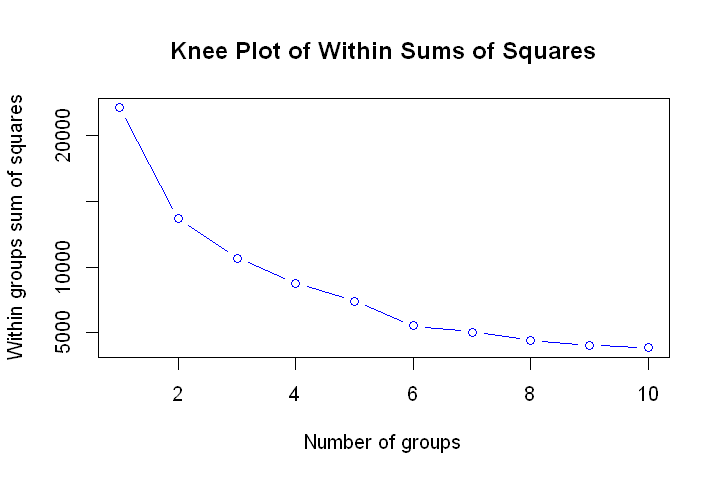

In [12]:
Compare <- data.frame(K=seq(1,10), withinss=rep(0,10), betweenss =  rep(0,10))

for (i in 1:10){
    set.seed(1234567)
    km_out <- kmeans(data14[,2:3],centers = i)
    Compare$withinss[i] <- km_out$tot.withinss
    Compare$betweenss[i] <- km_out$betweenss
}
print(Compare)

library(repr)
# Change plot size to 6 x 4
options(repr.plot.width=6, repr.plot.height=4)
plot(Compare$K, Compare$withinss, type = "b", xlab = "Number of groups", 
     ylab = "Within groups sum of squares", col="blue", 
     main="Knee Plot of Within Sums of Squares")



Select K=6, which gives a relatively significant drop in total withinss. 